In [ ]:
pip install mrjob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from mrjob.job import MRJob
from sklearn.metrics import accuracy_score
from collections import Counter
import string

In [ ]:
## Question - 1
## Part - 1
def EuclideanDistance(x,y):
    sum=0
    if len(x) == len(y):
        for i in range(len(x)):
            sum += (((x[i]-y[i])**2))
        return (sum**0.5)
    else:
        print("Lenght should be same.")

In [ ]:
list1 = [1,2,3,4,5]
list2 = [6,7,8,9,10]

SumofList = EuclideanDistance(list1,list2)
print("Euclidean Distance : ",SumofList)

Euclidean Distance :  11.180339887498949


In [ ]:
## Question - 1
## Part - 2
n = input("Enter Number: ")
n += 1
string = "cbabc"
for i in n:
    for j in n:


SyntaxError: cannot assign to function call (<ipython-input-177-0b4dfba4f4a9>, line 6)

In [ ]:
## Question - 3
df1 = pd.read_csv("student1.txt")
df1

,RollNo Code Grade
0,K22-1601 SE F
1,I21-1601 OS F
2,K21-1702 DS B
3,L21-1705 OS A
4,L22-2101 DB D


In [ ]:
%%file mid.py
from mrjob.job import MRJob
class CountStudents(MRJob):
    def mapper(self,_,line):
        roll,code,grade = line.split()
        yield roll,code

    def reducer(self,roll,code):
        yield roll,code

if __name__ == '__main__':
    CountStudents.run()

Overwriting mid.py


In [ ]:
! python "mid.py" "student1.txt"

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory C:\Users\Fast\AppData\Local\Temp\mid.Fast.20230329.071826.409267
Running step 1 of 1...

Error while reading from C:\Users\Fast\AppData\Local\Temp\mid.Fast.20230329.071826.409267\step\000\reducer\00000\input:

Traceback (most recent call last):
  File "mid.py", line 11, in <module>
    CountStudents.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\mrjob\job.py", line 616, in run
    cls().execute()
  File "C:\ProgramData\Anaconda3\lib\site-packages\mrjob\job.py", line 687, in execute
    self.run_job()
  File "C:\ProgramData\Anaconda3\lib\site-packages\mrjob\job.py", line 636, in run_job
    runner.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\mrjob\runner.py", line 503, in run
    self._run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\mrjob\sim.py", line 161, in _run
    self._run_step(step, step_num)
  File "C:\ProgramData\Anaconda3\lib\site-p

In [ ]:
## Question - 2
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("wine_dataset.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.dropna(inplace=True)

In [ ]:
corr = df.corr()
corr

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [ ]:
## As , Correlation is low between OD280 and Ash, That's why I've taken these two.

data = pd.read_csv('wine_dataset.csv')
data.head()

scaler = MinMaxScaler()
scaler.fit(data[['OD280']])
data['OD280'] = scaler.transform(data[['OD280']])

scaler.fit(data[['Ash']])
data['Ash'] = scaler.transform(data[['Ash']])

data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,0.572193,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,0.970696,1065
1,13.20,1.78,0.417112,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,0.780220,1050
2,13.16,2.36,0.700535,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,0.695971,1185
3,14.37,1.95,0.609626,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,0.798535,1480
4,13.24,2.59,0.807487,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,0.608059,735


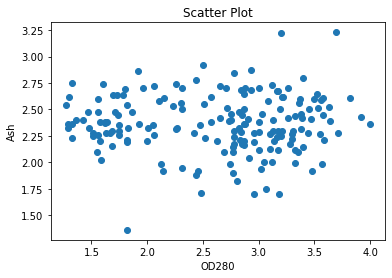

In [ ]:
x = df["OD280"]
y = df["Ash"]
plt.title('Scatter Plot')
plt.xlabel('OD280')
plt.ylabel('Ash')
plt.scatter(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


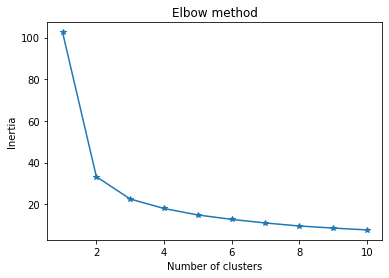

In [ ]:
data = list(zip(x, y))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='*')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

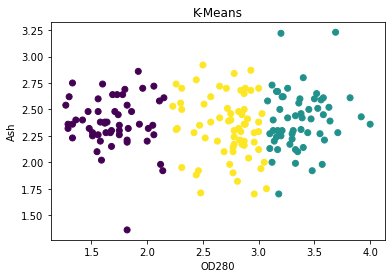

In [ ]:
kmeans = KMeans(n_clusters=3)
y_test = kmeans.fit(data)
kmeans.fit(data)
plt.xlabel('OD280')
plt.ylabel('Ash')
plt.title('K-Means')
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [ ]:
X_train, X_test = train_test_split(scaled_data, test_size=0.3)
k_folds = KFold(n_splits=5)
k_folds

KFold(n_splits=5, random_state=None, shuffle=False)

Text(0.5, 1.0, 'Dendrogram Complete Linkage')

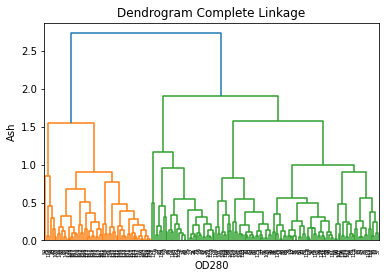

In [ ]:
X = df[["OD280","Ash"]].values
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_agg = agg_clustering.fit_predict(X)

dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))
plt.xlabel('OD280')
plt.ylabel('Ash')
plt.xticks(rotation=90)
plt.title('Dendrogram Complete Linkage')

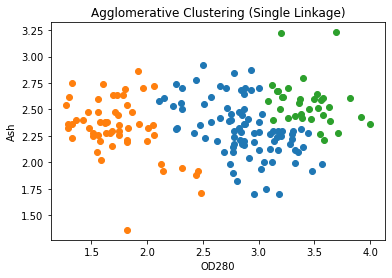

In [ ]:
plt.scatter(X[y_agg == 0, 0], X[y_agg == 0, 1])
plt.scatter(X[y_agg == 1, 0], X[y_agg == 1, 1])
plt.scatter(X[y_agg == 2, 0], X[y_agg == 2, 1])
plt.title('Agglomerative Clustering (Single Linkage)')
plt.xlabel('OD280')
plt.ylabel('Ash')
plt.show()

In [ ]:
y_test = kmeans.test(X_train)
y_pred = kmeans.predict(X_test)

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
acc_score = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Confusion Matrix (K=3):\n", conf_mat)
print("Accuracy Score (K=3):", acc_score)